In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#Import CDO and make sure it works
from cdo import *

#--Initialize CDO
cdo=Cdo()

%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.colors as colors
import collections

os.chdir('/vftmp/Jane.Baldwin/STEP/SYN_FIX/')

In [ ]:
#Possibilities for the MERRA decrease in compound proportion:
#1) MERRA has lower variance in the tropics
#2) MERRA has higher autocorrelation in tropics
#3) Some issue with applying the threshold only to a period it was calculated from...but I think that bias would result in fewer exceedances for MERRA?
#4) I made a mistake

In [3]:
#Raw data for analysis
files = {'cntl':'/ptmp/jwb/RAW/CONTROL/atmos_daily.04010101-04951231.t_ref_min.nc',
         'xco2':'/ptmp/jwb/RAW/2XCO2/atmos_daily.04010101-04951231.t_ref_min.nc'}
#Note: having problem doing autocorrelation calculation for 2xCO2 data.

flor_mask = '/ptmp/jwb/atmos_daily.static.nc'

merra = '/ptmp/jwb/MERRA/MERRA2_1980-2015.nc'

merra_mask = '/ptmp/jwb/MERRA/MERRA2_mask100.nc'

In [20]:
#MODEL CALCULATE SIGNAL, VAR, AUTOCORR

#Calculate Daily Climatology
#cdo.ydaymean(input='%s' %(value), options='-f nc', returnCdf=True, output=key+'_clim.nc')

#Calculate Daily Anomalies
#cdo.ydaysub(input='%s %s' %(value,'cntl_clim.nc'), options='-f nc', returnCdf=True, output='cntl_anom.nc')

#Calculate Detrended Daily Anomalies
#cdo.detrend(input='%s' %('cntl_anom.nc'), options='-f nc', returnCdf=True, output='cntl_detrend.nc')

#Amplitude of temperature variation (standard deviation of the raw temp data)
#cdo.timstd(input='-selmon,5/9 -seldate,0401-01-01,0495-12-31 %s' %('cntl_detrend.nc'), options='-f nc', returnCdf=True, output='cntl_detrend_amplitude_summer.nc')
#NOTE: there is a slight error for amplitude and autocorrelation in that I am putting the last day of September and first of May next to each other. More accurate would be to calculate on a yearly basis and average I think.

#Autocorrelation of temperature variation (r1 autocorrelation)
#cdo.timcor(input='-selmon,5/9 -seldate,0401-01-02,0495-12-30 %s -selmon,5/9 -seldate,0401-01-02,0495-12-30 -shifttime,1day %s' %('cntl_detrend.nc','cntl_detrend.nc'), options='-f nc', returnCdf=True, output='cntl_detrend_autocorr_summer.nc')

#Create masked FLOR data
cdo.gtc('0.5',input='-selvar,land_mask %s' %(flor_mask), options='-f nc', returnCdf=True, output='flor_mask.nc')
cdo.ifthen(input='flor_mask.nc cntl_detrend_autocorr_summer.nc', options='-f nc', returnCdf=True, output='cntl_detrend_autocorr_summer_mask.nc')
cdo.ifthen(input='flor_mask.nc cntl_detrend_amplitude_summer.nc', options='-f nc', returnCdf=True, output='cntl_detrend_amplitude_summer_mask.nc')


<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Mon Oct 16 12:39:54 2017: cdo -f nc ifthen flor_mask.nc cntl_detrend_amplitude_summer.nc cntl_detrend_amplitude_summer_mask.nc
Sat Oct 14 18:07:59 2017: cdo -f nc timstd -selmon,5/9 -seldate,0401-01-01,0495-12-31 cntl_detrend.nc cntl_detrend_amplitude_summer.nc
Mon Oct 09 11:28:45 2017: cdo -f nc detrend cntl_anom.nc cntl_detrend.nc
Thu Sep 28 18:54:56 2017: cdo -f nc ydaysub /ptmp/jwb/RAW/CONTROL/atmos_daily.04010101-04951231.t_ref_min.nc cntl_clim.nc cntl_anom.nc
Thu Sep 28 18:52:58 2017: cdo -f nc ydaymean /ptmp/jwb/RAW/CONTROL/atmos_daily.04010101-04951231.t_ref_min.nc cntl_clim.nc
Sun Jun  5 22:57:18 2016: ncrcat atmos_daily.04010101-04051231.t_ref_min.nc atmos_daily.04060101-04101231.t_ref_min.nc atmos_daily.04110101-04151231.t_ref_min.nc atmos_daily.04160101-04201231.t_ref_min

In [17]:
#MERRA CALCULATE SIGNAL, VAR, AUTOCORR

#Calculate Daily Climatology
#cdo.ydaymean(input='%s' %(merra), options='-f nc', returnCdf=True, output='merra_clim.nc')

#Calculate Daily Anomalies
#cdo.ydaysub(input='%s %s' %(merra,'merra_clim.nc'), options='-f nc', returnCdf=True, output='merra_anom.nc')

#Calculate Detrended Daily Anomalies
#cdo.detrend(input='%s' %('merra_anom.nc'), options='-f nc', returnCdf=True, output='merra_detrend.nc')

#Amplitude of temperature variation (standard deviation of the raw temp data)
#cdo.timstd(input='-selmon,5/9 -seldate,1980-01-01,2015-12-31 %s' %('merra_anom.nc'), options='-f nc', returnCdf=True, output='merra_anom_amplitude.nc')
#cdo.timstd(input='-selmon,5/9 -seldate,1980-01-01,2015-12-31 %s' %('merra_detrend.nc'), options='-f nc', returnCdf=True, output='merra_detrend_amplitude_summer.nc')
#NOTE: there is a slight error for amplitude and autocorrelation in that I am putting the last day of September and first of May next to each other. More accurate would be to calculate on a yearly basis and average I think.

#Autocorrelation of temperature variation (r1 autocorrelation)
#cdo.timcor(input='-seldate,1980-01-02,2015-12-30 %s -seldate,1980-01-02,2015-12-30 -shifttime,1day %s' %('merra_anom.nc','merra_anom.nc'), options='-f nc', returnCdf=True, output='merra_anom_autocorr.nc')
#cdo.timcor(input='-selmon,5/9 -seldate,1980-01-02,2015-12-30 %s -selmon,5/9 -seldate,1980-01-02,2015-12-30 -shifttime,1day %s' %('merra_detrend.nc','merra_detrend.nc'), options='-f nc', returnCdf=True, output='merra_detrend_autocorr_summer.nc')

#Create Masked MERRA Data
#cdo.gtc('50',input='%s' %(merra_mask), options='-f nc', returnCdf=True, output='merra_mask.nc')
#cdo.ifthen(input='merra_mask.nc merra_detrend_autocorr_summer.nc', options='-f nc', returnCdf=True, output='merra_detrend_autocorr_summer_mask.nc')
#cdo.ifthen(input='merra_mask.nc merra_detrend_amplitude_summer.nc', options='-f nc', returnCdf=True, output='merra_detrend_amplitude_summer_mask.nc')

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1
    history: Mon Oct 16 12:20:16 2017: cdo -f nc ifthen merra_mask.nc merra_detrend_amplitude_summer.nc merra_detrend_amplitude_summer_mask.nc
Sat Oct 14 22:06:35 2017: cdo -f nc timstd -selmon,5/9 -seldate,1980-01-01,2015-12-31 merra_detrend.nc merra_detrend_amplitude_summer.nc
Sat Oct 14 15:46:36 2017: cdo -f nc detrend merra_anom.nc merra_detrend.nc
Mon Oct 09 10:45:27 2017: cdo -f nc ydaysub /ptmp/jwb/MERRA/MERRA2_1980-2015.nc merra_clim.nc merra_anom.nc
Mon Oct 09 10:43:53 2017: cdo -f nc ydaymean /ptmp/jwb/MERRA/MERRA2_1980-2015.nc merra_clim.nc
    nco_openmp_thread_number: 1
    Comment: GMAO filename: d5124_m2_jan79.statD_2d_slv_Nx.19800101.nc4
    History: Original file generated: Sat May 31 17:21:11 2014 GMT
    Filename: MERRA2_100.statD_2d_slv_Nx.19800101.nc4
    Institution: NASA Glob

In [26]:
#PULL DATA FROM NETCDF FILES
#Regridded MERRA Variance and Autocorrelation Data to FLOR's grid (and visa versa) using FERRET @ave transformation

var = {}
autocorr = {}

var['cntl_detrend'] = np.squeeze(Dataset('cntl_detrend_amplitude_summer_mask.nc','r')['t_ref_min'][:])
var['cntl_detrend_regrid'] = np.squeeze(Dataset('cntl_detrend_amplitude_summer_mask_merragrid.nc','r')['T_REF_MIN_MERRAGRID'][:])
var['merra_detrend'] = np.squeeze(Dataset('merra_detrend_amplitude_summer_mask.nc','r')['T2MMIN'][:])
var['merra_detrend_regrid'] = np.squeeze(Dataset('merra_detrend_amplitude_summer_mask_florgrid.nc','r')['T2MMIN_FLORGRID'][:])

autocorr['cntl_detrend'] = np.squeeze(Dataset('cntl_detrend_autocorr_summer_mask.nc','r')['t_ref_min'][:])
autocorr['cntl_detrend_regrid'] = np.squeeze(Dataset('cntl_detrend_autocorr_summer_mask_merragrid.nc','r')['T_REF_MIN_MERRAGRID'][:])
autocorr['merra_detrend'] = np.squeeze(Dataset('merra_detrend_autocorr_summer_mask.nc','r')['T2MMIN'][:])
autocorr['merra_detrend_regrid'] = np.squeeze(Dataset('merra_detrend_autocorr_summer_mask_florgrid.nc','r')['T2MMIN_FLORGRID'][:])

merra_lon = np.squeeze(Dataset('merra_detrend_autocorr_summer_mask.nc','r')['LON'][:])
merra_lat = np.squeeze(Dataset('merra_detrend_autocorr_summer_mask.nc','r')['LAT'][:])
cntl_lon = np.squeeze(Dataset('cntl_detrend_amplitude_summer_mask.nc','r')['lon'][:])
cntl_lat = np.squeeze(Dataset('cntl_detrend_amplitude_summer_mask.nc','r')['lat'][:])

In [17]:
#Calculate Area Average
lat_s = -90
lat_n = 90
lon_w = 0
lon_e = 360

def flormean(var):
    lats0 = cntl_lat
    lons0 = cntl_lon
    mlats = np.transpose(np.tile(lats0,(lons0.shape[0],1)))
    weights = np.cos(np.deg2rad(mlats))
    mlons = np.tile(lons0,(lats0.shape[0],1))
    lats_mask = np.logical_and(mlats >= lat_s, mlats <= lat_n)
    lons_mask = np.logical_and(mlons >= lon_w, mlons <= lon_e)
    reg_mask = lats_mask*lons_mask
    regmean = np.ma.average(var[reg_mask], weights = weights[reg_mask])
    return regmean

def merramean(var):
    lats0 = merra_lat
    lons0 = merra_lon
    mlats = np.transpose(np.tile(lats0,(lons0.shape[0],1)))
    weights = np.cos(np.deg2rad(mlats))
    mlons = np.tile(lons0,(lats0.shape[0],1))
    lats_mask = np.logical_and(mlats >= lat_s, mlats <= lat_n)
    lons_mask = np.logical_and(mlons >= lon_w, mlons <= lon_e)
    reg_mask = lats_mask*lons_mask
    regmean = np.ma.average(var[reg_mask], weights = weights[reg_mask])
    return regmean

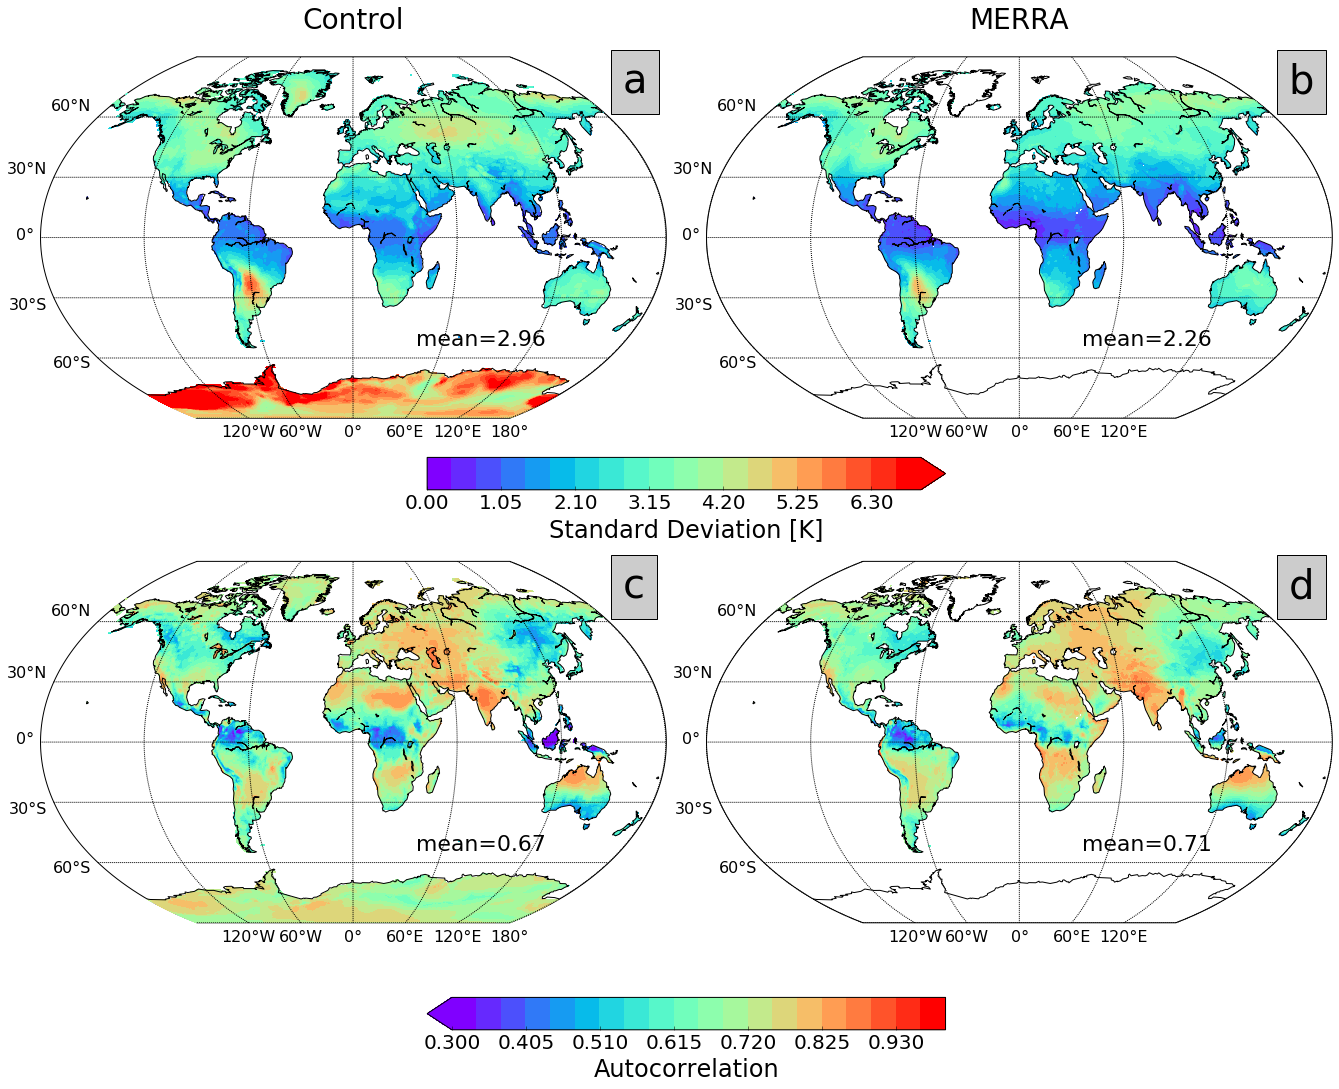

In [18]:
#MAPS OF NON-DETRENDED DATA

fig = plt.figure(figsize=(18,15))

fs = 16

startm = merra_lon[0]
y1m = -90
y2m = 90
sfm = 0
x1m = startm+sfm
lon0m = startm+180+sfm

start = cntl_lon[0]
y1 = -90
y2 = 90
sf = 180
x1 = start+sf
lon0 = start+180+sf

ax1 = plt.subplot(2,2,1)
var2 = var['cntl_detrend']
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
bounds=np.linspace(0,7,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=plt.cm.rainbow,extend='max')
ax1.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax1.transAxes,fontsize=22)

ax3 = plt.subplot(2,2,3)
var2 = autocorr['cntl_detrend']
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(0.3,1,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=plt.cm.rainbow,extend='min')
ax3.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax3.transAxes,fontsize=22)

ax2 = plt.subplot(2,2,2)
var2 = var['merra_detrend']
shift, lons = shiftgrid(x1m,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0m,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(0,7,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
xi, yi = m(lon, lat)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=plt.cm.rainbow,extend='max')
ax2.text(.6, .2, 'mean=%.2f'%merramean(var2), transform=ax2.transAxes,fontsize=22)

ax4 = plt.subplot(2,2,4)
var2 = autocorr['merra_detrend']
shift, lons = shiftgrid(x1m,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0m,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(0.3,1,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
xi, yi = m(lon, lat)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=plt.cm.rainbow,extend='min')
ax4.text(.6, .2, 'mean=%.2f'%merramean(var2), transform=ax4.transAxes,fontsize=22)

ax1.text(0.5,1.1, "Control", transform=ax1.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')
ax2.text(0.5,1.1, "MERRA", transform=ax2.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')

ax1.text(0.93,0.9, "a", transform=ax1.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax2.text(0.93,0.9, "b", transform=ax2.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.93,0.9, "c", transform=ax3.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax4.text(0.93,0.9, "d", transform=ax4.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.3, 0.5, 0.4, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('Standard Deviation [K]', fontsize=24)
art.ax.tick_params(labelsize=20)
caxp = fig.add_axes([0.3, 0.0, 0.4, 0.03])
art2 = plt.colorbar(csp, caxp, orientation='horizontal',extend='max')
art2.set_label('Autocorrelation', fontsize=24)
art2.ax.tick_params(labelsize=20)

plt.tight_layout(pad=0.2, w_pad=4, h_pad=5)

#fig.savefig('var_autocorr.pdf',bbox_inches='tight')

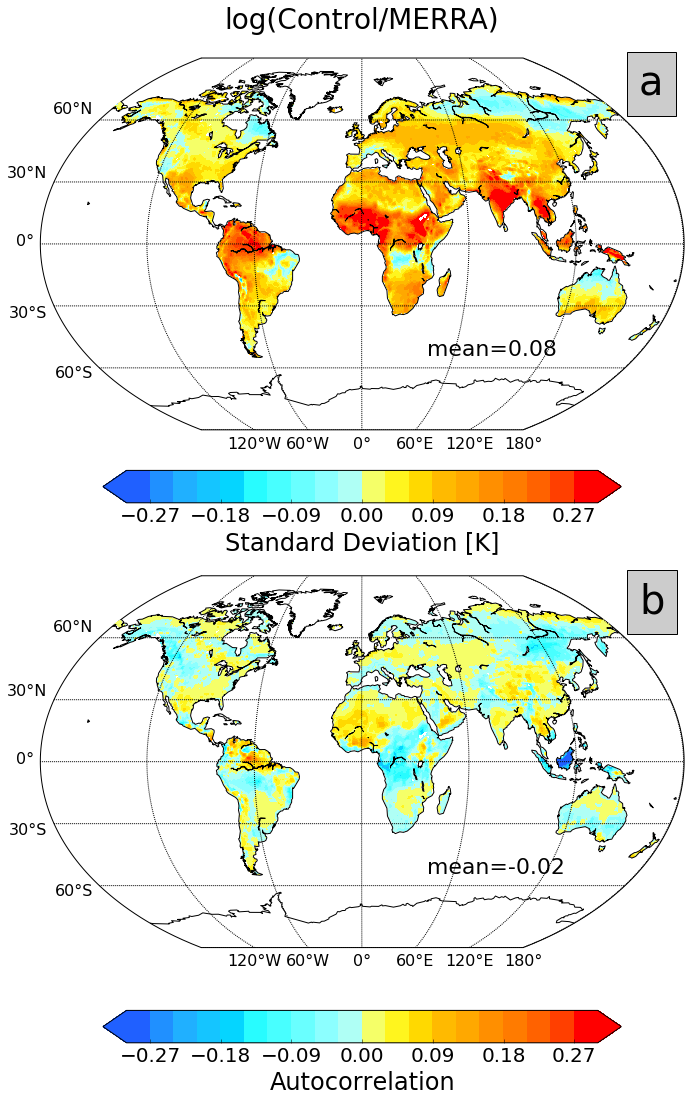

In [46]:
#FLOR GRID LOG COMPARISON
#Regridded MERRA Variance and Autocorrelation Data to FLOR's grid using FERRET @ave transformation

logdvar = np.log10(var['cntl_detrend']/var['merra_detrend_regrid'])
logdautocorr = np.log10(autocorr['cntl_detrend']/autocorr['merra_detrend_regrid'])

fig = plt.figure(figsize=(9,15))

fs = 16

start = cntl_lon[0]
y1 = -90
y2 = 90
sf = 180
x1 = start+sf
lon0 = start+180+sf

ax1 = plt.subplot(2,1,1)
var2 = logdvar
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
bounds=np.linspace(-0.3,0.3,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green,extend='both')
ax1.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax1.transAxes,fontsize=22)

ax3 = plt.subplot(2,1,2)
var2 = logdautocorr
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(-0.3,0.3,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green,extend='both')
ax3.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax3.transAxes,fontsize=22)

ax1.text(0.5,1.1, "log(Control/MERRA)", transform=ax1.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')

ax1.text(0.93,0.9, "a", transform=ax1.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.93,0.9, "b", transform=ax3.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.1, 0.5, 0.8, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('Standard Deviation [K]', fontsize=24)
art.ax.tick_params(labelsize=20)
caxp = fig.add_axes([0.1, 0.0, 0.8, 0.03])
art2 = plt.colorbar(csp, caxp, orientation='horizontal')
art2.set_label('Autocorrelation', fontsize=24)
art2.ax.tick_params(labelsize=20)

fig.tight_layout(pad=0.2, w_pad=4, h_pad=5)
fig.savefig('dlog_controlmerra_varautocorr.png', bbox_inches='tight')


/home/jwb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/home/jwb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


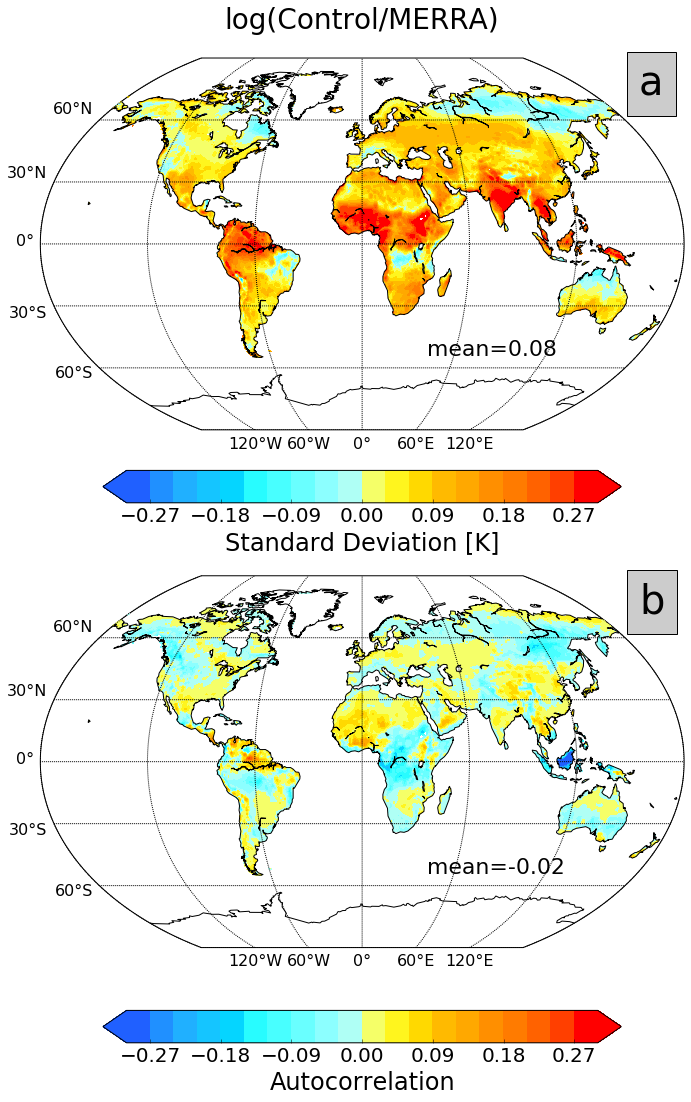

In [45]:
#MERRA GRID LOG COMPARISON
#Regridded MERRA Variance and Autocorrelation Data to FLOR's grid using FERRET @ave transformation

logdvar = np.log10(var['cntl_detrend_regrid']/var['merra_detrend'])
logdautocorr = np.log10(autocorr['cntl_detrend_regrid']/autocorr['merra_detrend'])

fig = plt.figure(figsize=(9,15))

fs = 16

start = merra_lon[0]
y1 = -90
y2 = 90
sf = 0
x1 = start+sf
lon0 = start+180+sf

ax1 = plt.subplot(2,1,1)
var2 = logdvar
shift, lons = shiftgrid(x1,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
bounds=np.linspace(-0.3,0.3,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green,extend='both')
ax1.text(.6, .2, 'mean=%.2f'%merramean(var2),transform=ax1.transAxes,fontsize=22)

ax3 = plt.subplot(2,1,2)
var2 = logdautocorr
shift, lons = shiftgrid(x1,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(-0.3,0.3,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green,extend='both')
ax3.text(.6, .2, 'mean=%.2f'%merramean(var2),transform=ax3.transAxes,fontsize=22)

ax1.text(0.5,1.1, "log(Control/MERRA)", transform=ax1.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')

ax1.text(0.93,0.9, "a", transform=ax1.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.93,0.9, "b", transform=ax3.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.1, 0.5, 0.8, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('Standard Deviation [K]', fontsize=24)
art.ax.tick_params(labelsize=20)
caxp = fig.add_axes([0.1, 0.0, 0.8, 0.03])
art2 = plt.colorbar(csp, caxp, orientation='horizontal')
art2.set_label('Autocorrelation', fontsize=24)
art2.ax.tick_params(labelsize=20)

fig.tight_layout(pad=0.2, w_pad=4, h_pad=5)
fig.savefig('dlog_controlmerra_varautocorr_merragrid.png', bbox_inches='tight')

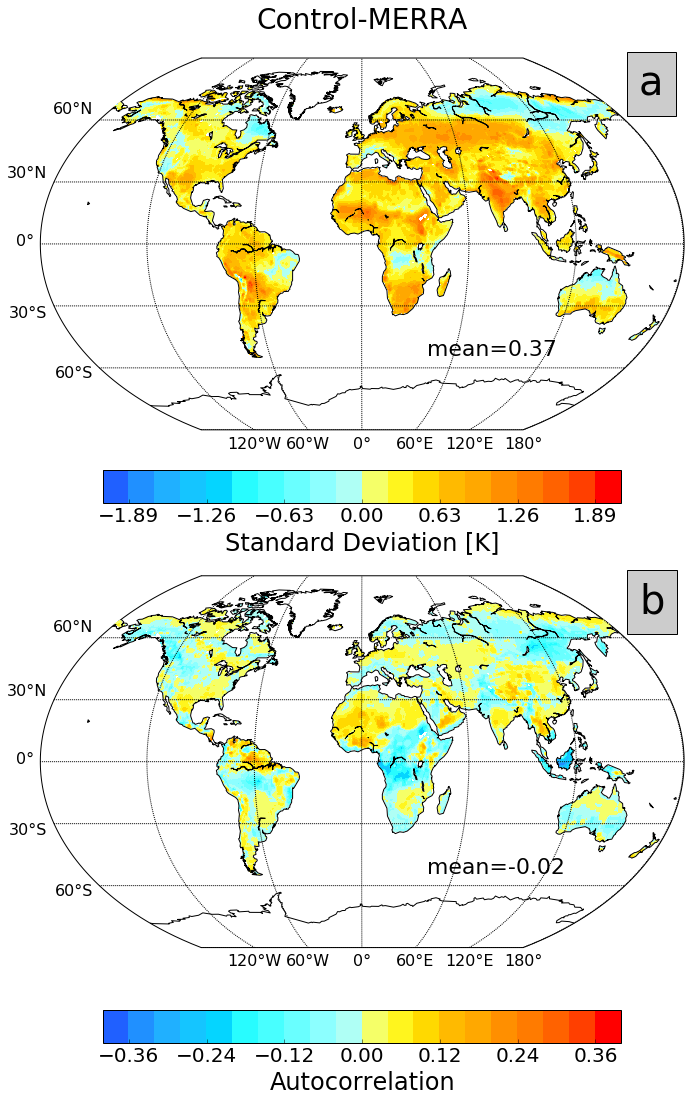

In [44]:
#FLOR GRID ABSOLUTE COMPARISON
#Regridded MERRA Variance and Autocorrelation Data to FLOR's grid using FERRET @ave transformation

dvar = var['cntl_detrend']-var['merra_detrend_regrid']
dautocorr = autocorr['cntl_detrend']-autocorr['merra_detrend_regrid']

fig = plt.figure(figsize=(9,15))

fs = 16

start = cntl_lon[0]
y1 = -90
y2 = 90
sf = 180
x1 = start+sf
lon0 = start+180+sf

ax1 = plt.subplot(2,1,1)
var2 = dvar
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
bounds=np.linspace(-2.1,2.1,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green)
ax1.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax1.transAxes,fontsize=22)

ax3 = plt.subplot(2,1,2)
var2 = dautocorr
shift, lons = shiftgrid(x1,var2,cntl_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, cntl_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(-0.4,0.4,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green)
ax3.text(.6, .2, 'mean=%.2f'%flormean(var2),transform=ax3.transAxes,fontsize=22)

ax1.text(0.5,1.1, "Control-MERRA", transform=ax1.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')

ax1.text(0.93,0.9, "a", transform=ax1.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.93,0.9, "b", transform=ax3.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.1, 0.5, 0.8, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('Standard Deviation [K]', fontsize=24)
art.ax.tick_params(labelsize=20)
caxp = fig.add_axes([0.1, 0.0, 0.8, 0.03])
art2 = plt.colorbar(csp, caxp, orientation='horizontal')
art2.set_label('Autocorrelation', fontsize=24)
art2.ax.tick_params(labelsize=20)

fig.tight_layout(pad=0.2, w_pad=4, h_pad=5)
fig.savefig('d_controlmerra_varautocorr.png', bbox_inches='tight')

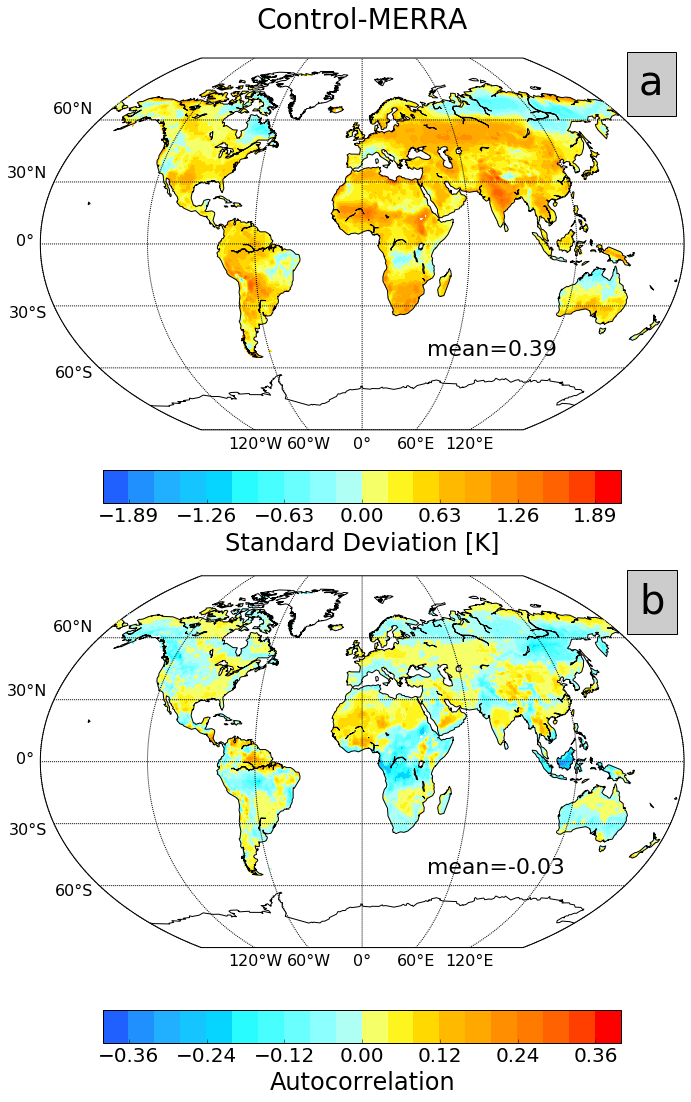

In [43]:
#FLOR GRID ABSOLUTE COMPARISON
#Regridded MERRA Variance and Autocorrelation Data to FLOR's grid using FERRET @ave transformation

dvar = var['cntl_detrend_regrid']-var['merra_detrend']
dautocorr = autocorr['cntl_detrend_regrid']-autocorr['merra_detrend']

fig = plt.figure(figsize=(9,15))

fs = 16

start = merra_lon[0]
y1 = -90
y2 = 90
sf = 0
x1 = start+sf
lon0 = start+180+sf

ax1 = plt.subplot(2,1,1)
var2 = dvar
shift, lons = shiftgrid(x1,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
bounds=np.linspace(-2.1,2.1,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green)
ax1.text(.6, .2, 'mean=%.2f'%merramean(var2),transform=ax1.transAxes,fontsize=22)

ax3 = plt.subplot(2,1,2)
var2 = dautocorr
shift, lons = shiftgrid(x1,var2,merra_lon,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, merra_lat)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
bounds=np.linspace(-0.4,0.4,21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
csp = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cm.GMT_no_green)
ax3.text(.6, .2, 'mean=%.2f'%merramean(var2),transform=ax3.transAxes,fontsize=22)

ax1.text(0.5,1.1, "Control-MERRA", transform=ax1.transAxes, fontsize=28, rotation='horizontal',ha='center',va='center')

ax1.text(0.93,0.9, "a", transform=ax1.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.93,0.9, "b", transform=ax3.transAxes, fontsize=40, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.1, 0.5, 0.8, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('Standard Deviation [K]', fontsize=24)
art.ax.tick_params(labelsize=20)
caxp = fig.add_axes([0.1, 0.0, 0.8, 0.03])
art2 = plt.colorbar(csp, caxp, orientation='horizontal')
art2.set_label('Autocorrelation', fontsize=24)
art2.ax.tick_params(labelsize=20)

fig.tight_layout(pad=0.2, w_pad=4, h_pad=5)
fig.savefig('d_controlmerra_varautocorr_merragrid.png', bbox_inches='tight')
